### Importing libraries

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import tensorflow
import torch
import tarfile
from PIL import Image
from numpy import argmax
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from os.path import isfile, isdir
from tqdm import tqdm 
from pathlib import Path
import pandas as pd
import io
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DownloadProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num


In [4]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        return dict


In [5]:
data1=unpickle("data_batch_1")
data2=unpickle("data_batch_2")
data3=unpickle("data_batch_3")
data4=unpickle("data_batch_4")
data5=unpickle("data_batch_5")
test=unpickle("test_batch")

data1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
x_data1=data1[b'data']
x_data2=data2[b'data']
x_data3=data3[b'data']
x_data4=data4[b'data']
x_data5=data5[b'data']

y_data1=data1[b'labels']
y_data2=data2[b'labels']
y_data3=data3[b'labels']
y_data4=data4[b'labels']
y_data5=data5[b'labels']

### Concatenating all the datasets together

In [7]:
x_train=np.concatenate((x_data1,x_data2,x_data3,x_data4,x_data5),axis=0)
y_train=np.concatenate((y_data1,y_data2,y_data3,y_data4,y_data5),axis=0)

print('length of training set: ' + str(len(y_train)))

length of training set: 50000


In [8]:
X_train=x_train.reshape(len(x_train),3,32,32).transpose(0,2,3,1)
y_train=to_categorical(y_train,10)

#### Loading the test dataset:

In [9]:
test=unpickle('test_batch')
X_test=test[b'data'].reshape(len(test[b'data']),3,32,32).transpose(0,2,3,1)
y_test=to_categorical(test[b'labels'],10)

In [10]:
def classes():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### dataset characteristics of data sets

### shape of a single image :

In [12]:
print(X_train[0].shape)

(32, 32, 3)


### plotting the train images

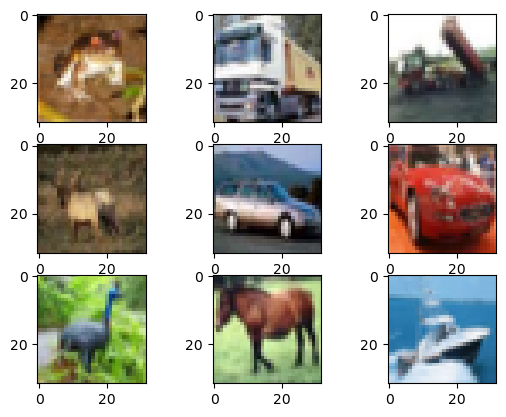

In [13]:
for i in range (0,9):
    plt.subplot(330+1+i)
    itrain = X_train[i]
    plt.imshow(itrain)

### plotting test images

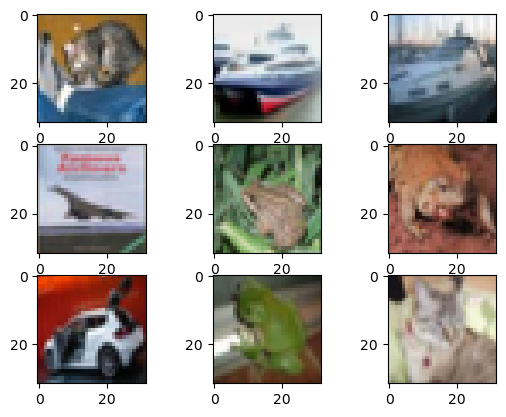

In [14]:
for i in range (0,9):
    plt.subplot(330+1+i)
    itest = X_test[i]
    plt.imshow(itest)

## Preprocessing 

### Normalizing

In [15]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [16]:
nor=255.0

In [17]:
X_train /= nor
X_test /= nor 

In [18]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


### class labels shape

In [19]:
numCls=10

# SGD ## Gradient Descent

In [20]:
ks = (3,3)
st = (1,1)
ish = (32,32,3)
act = 'relu'
pad = 'same'
ps = (2,2)

In [21]:
from hyperactive import Hyperactive
from hyperactive.optimizers import ParticleSwarmOptimizer
from keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    Activation,
)
from tensorflow.keras import optimizers
from keras.optimizers import SGD

In [22]:
sgd =Sequential() 
sgd.add(Conv2D(50, (3, 3), strides=st, padding=pad, input_shape=ish))
sgd.add(Activation("relu"))
    
sgd.add(Conv2D(125, (3, 3), strides=st, padding=pad, activation=act))
sgd.add(MaxPool2D(pool_size=ps))
sgd.add(Dropout(0.25))
    
sgd.add(Conv2D(125, (3, 3), strides=st, padding=pad, activation=act))
sgd.add(MaxPool2D(pool_size=ps))
sgd.add(Dropout(0.25))
    
sgd.add(Flatten(input_shape=ish))
sgd.add(Dense(500, act))
sgd.add(Dropout(0.5))
sgd.add(Dense(250, act))
sgd.add(Dropout(0.5))
sgd.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)

Metal device set to: Apple M2


2022-12-07 12:12:16.971537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 12:12:16.971842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/mukesh/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
sgd.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
sgd.fit(X_train, y_train, epochs=50, batch_size=128)
sgd.evaluate(x=X_test, y=y_test)

Epoch 1/50


2022-12-07 12:12:18.033779: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 12:12:18.284781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 26s 66ms/step - loss: 2.2812 - accuracy: 0.1391
Epoch 2/50
391/391 [==============================] - 27s 70ms/step - loss: 2.1023 - accuracy: 0.2202
Epoch 3/50
391/391 [==============================] - 28s 71ms/step - loss: 1.9762 - accuracy: 0.2788
Epoch 4/50
391/391 [==============================] - 27s 68ms/step - loss: 1.8599 - accuracy: 0.3357
Epoch 5/50
391/391 [==============================] - 26s 66ms/step - loss: 1.7402 - accuracy: 0.3763
Epoch 6/50
391/391 [==============================] - 26s 67ms/step - loss: 1.6589 - accuracy: 0.3995
Epoch 7/50
391/391 [==============================] - 27s 68ms/step - loss: 1.6014 - accuracy: 0.4219
Epoch 8/50
391/391 [==============================] - 27s 69ms/step - loss: 1.5537 - accuracy: 0.4357
Epoch 9/50
391/391 [==============================] - 27s 70ms/step - loss: 1.5087 - accuracy: 0.4556
Epoch 10/50
391/391 [==============================] - 28s 71ms/step - loss: 1.4687 - accurac

2022-12-07 12:35:25.880892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 14ms/step - loss: 0.7264 - accuracy: 0.7424


[0.7264358997344971, 0.742400050163269]

# PSO

In [27]:
from hyperactive import Hyperactive
from hyperactive.optimizers import ParticleSwarmOptimizer
from keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    Activation,
)
from tensorflow.keras import optimizers

In [28]:
y_train.shape

(50000, 10)

In [29]:
y_test.shape

(10000, 10)

In [30]:
def model(opt):
    nn = Sequential()
    nn.add(Conv2D(opt["filter.0"],(3, 3),padding="same",input_shape=X_train.shape[1:],))
    nn.add(Activation("relu"))
    nn.add(Conv2D(opt["filter.0"], (3, 3)))
    nn.add(Activation("relu"))
    nn.add(MaxPooling2D(pool_size=(2, 2)))
    nn.add(Dropout(0.25))

    nn.add(Conv2D(opt["filter.0"], (3, 3), padding="same"))
    nn.add(Activation("relu"))
    nn.add(MaxPooling2D(pool_size=(2, 2)))
    nn.add(Dropout(0.25))

    nn.add(Flatten())
    nn.add(Dense(opt["layer.0"]))
    nn.add(Activation("relu"))
    nn.add(Dropout(0.5))
    nn.add(Dense(opt["layer.0"]))
    nn.add(Activation("relu"))
    nn.add(Dropout(0.5))
    nn.add(Dense(10))
    nn.add(Activation("softmax"))

    nn.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    nn.fit(X_train, y_train, epochs=50, batch_size=128)

    _, score = nn.evaluate(x=X_test, y=y_test)

    return score

In [31]:
search_space = {
    "filter.0": [50,125,125],
    "layer.0": [500,250],
}





optimizer = ParticleSwarmOptimizer(
    inertia=0.4,
    cognitive_weight=0.7,
    social_weight=0.7,
    temp_weight=0.3,
    rand_rest_p=0.05,
)

hyper = Hyperactive()
hyper.add_search(model, search_space, optimizer=optimizer, n_iter=1)
hyper.run()

model:   0%|                                              | 0/1 [00:00<?, ?it/s]

Epoch 1/50


2022-12-07 12:43:19.818806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 34s 85ms/step - loss: 1.7315 - accuracy: 0.3558
Epoch 2/50
391/391 [==============================] - 33s 85ms/step - loss: 1.2339 - accuracy: 0.5577
Epoch 3/50
391/391 [==============================] - 33s 84ms/step - loss: 1.0407 - accuracy: 0.6350
Epoch 4/50
391/391 [==============================] - 33s 84ms/step - loss: 0.9210 - accuracy: 0.6796
Epoch 5/50
391/391 [==============================] - 33s 83ms/step - loss: 0.8417 - accuracy: 0.7074
Epoch 6/50
391/391 [==============================] - 33s 83ms/step - loss: 0.7784 - accuracy: 0.7281
Epoch 7/50
391/391 [==============================] - 33s 83ms/step - loss: 0.7264 - accuracy: 0.7456
Epoch 8/50
391/391 [==============================] - 33s 83ms/step - loss: 0.6919 - accuracy: 0.7590
Epoch 9/50
391/391 [==============================] - 33s 83ms/step - loss: 0.6570 - accuracy: 0.7708
Epoch 10/50
391/391 [==============================] - 33s 83ms/step - loss: 0.6300 - accurac

2022-12-07 13:15:12.484890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step - loss: 0.7041 - accuracy: 0.7913



Results: 'model'  
   Best score: 0.7913000583648682  
   Best parameter set:
      'filter.0' : 125  
      'layer.0'  : 250  
   Best iteration: 0  
 
   Random seed: 336788398  
 
   Evaluation time   : 1919.5838010311127 sec    [100.0 %]
   Optimization time : 0.0074558258056640625 sec    [0.0 %]
   Iteration time    : 1919.5912568569183 sec    [1919.59 sec/iter]
 


# CNN


###  sequential model

In [11]:
from keras.models import Sequential

In [12]:
v = Sequential()

Metal device set to: Apple M2


2022-12-07 13:55:21.387110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 13:55:21.387670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### convolutional layer

In [13]:
ks = (3,3)
st = (1,1)
ish = (32,32,3)
act = 'relu'
pad = 'same'
ps = (2,2)

In [14]:
v.add(Conv2D(50, kernel_size=ks, strides=st, padding=pad, activation=act, input_shape=ish))

In [15]:
v.add(Conv2D(125, kernel_size=ks, strides=st, padding=pad, activation=act))
v.add(MaxPool2D(pool_size=ps))
v.add(Dropout(0.25))

In [16]:
v.add(Conv2D(125, kernel_size=ks, strides=st, padding=pad, activation=act))
v.add(MaxPool2D(pool_size=ps))
v.add(Dropout(0.25))

### flatten output

In [17]:
v.add(Flatten(input_shape=ish))

### hidden layer

In [18]:
v.add(Dense(500, act))
v.add(Dropout(0.5))
v.add(Dense(250, act))
v.add(Dropout(0.5))

### output layer

In [19]:
v.add(Dense(10, activation='softmax'))

### compiling the  model

In [20]:
v.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### training the model 

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 10)

In [23]:
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_test.shape

(10000, 10)

In [25]:
v.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


2022-12-07 13:55:41.714269: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 13:55:41.888664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 2.7294 - accuracy: 0.2275

2022-12-07 13:56:06.623424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 26s 67ms/step - loss: 2.7294 - accuracy: 0.2275 - val_loss: 1.7199 - val_accuracy: 0.3824
Epoch 2/50
391/391 [==============================] - 26s 67ms/step - loss: 1.6124 - accuracy: 0.4089 - val_loss: 1.3744 - val_accuracy: 0.4965
Epoch 3/50
391/391 [==============================] - 26s 67ms/step - loss: 1.3589 - accuracy: 0.5136 - val_loss: 1.1750 - val_accuracy: 0.5850
Epoch 4/50
391/391 [==============================] - 27s 69ms/step - loss: 1.2045 - accuracy: 0.5766 - val_loss: 1.0903 - val_accuracy: 0.6157
Epoch 5/50
391/391 [==============================] - 26s 67ms/step - loss: 1.0853 - accuracy: 0.6199 - val_loss: 1.0033 - val_accuracy: 0.6513
Epoch 6/50
391/391 [==============================] - 26s 67ms/step - loss: 1.0051 - accuracy: 0.6490 - val_loss: 0.9462 - val_accuracy: 0.6654
Epoch 7/50
391/391 [==============================] - 26s 67ms/step - loss: 0.9463 - accuracy: 0.6725 - val_loss: 0.9114 - val_accuracy: 0.6897
Epo

<AxesSubplot: >

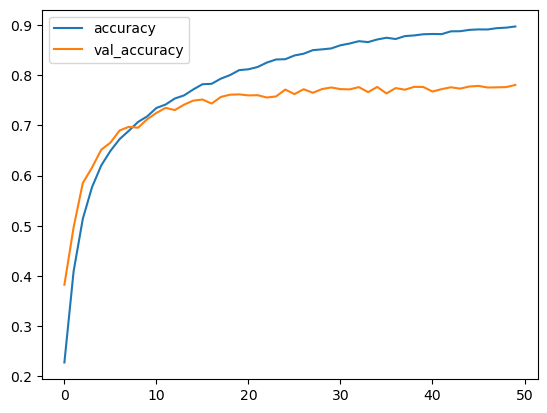

In [26]:
import pandas as pd
metrics = pd.DataFrame(v.history.history)
metrics[["accuracy", "val_accuracy"]].plot()

### Evaluating both the train  and test 

In [27]:
v.evaluate(X_train, y_train)

1563/1563 [==============================] - 21s 13ms/step - loss: 0.0920 - accuracy: 0.9811


[0.09197115153074265, 0.9810800552368164]

In [28]:
v.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.7593 - accuracy: 0.7804


[0.7593227624893188, 0.7804000377655029]

In [33]:
v.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 125)       56375     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 125)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 125)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       140750    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                    